In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import time
from IPython.display import clear_output

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [11]:
from tensorflow.keras.regularizers import l1, l2, L1L2

In [4]:
from sklearn.datasets import make_moons

def get_moon_data(noise=0.2):
    x, y = make_moons(n_samples=100, noise=noise, random_state=32)

    df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.show()

    split_index = int(len(x)*0.3)
    train_x, test_x = x[:split_index], x[split_index:]
    train_y, test_y = y[:split_index], y[split_index:]
    return (train_x, train_y), (test_x, test_y)

In [52]:
def get_sin_data(start=0, end=10, step=0.1):
    x = np.arange(start,end,step)
    np.random.shuffle(x)
    y = np.sin(x)

    split_index = int(x.shape[0]*0.6)

    train_x, test_x = x[:split_index], x[split_index:]
    train_y, test_y = y[:split_index], y[split_index:]

    return (train_x, train_y), (test_x, test_y)

In [53]:
def build_model():
    model = Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(1,)))
    model.add(Dense(10, activation='tanh'))
    # model.add(Flatten(input_shape=(28, 28)))
    # model.add(Dense(10, activation='relu'))
    # model.add(Dense(10, activation='relu'))
    # model.add(Dense(10, activation='softmax'))
    # model.add(Dense(20, input_shape=(2,), activation='relu', kernel_regularizer=l2() ))
    # model.add(BatchNormalization())
    # model.add(Dropout(0.2))
    # model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
    # model.add(BatchNormalization())
    # model.add(Dropout(0.2))
    model.add(Dense(1))
    
    # optimizer = optimizers.SGD(learning_rate=0.01)
    optimizer = optimizers.Adam(learning_rate=0.001)
    # optimizer = optimizers.Adagrad(learning_rate=0.001)
    # optimizer = optimizers.RMSprop(learning_rate=0.001)
    
    model.compile(optimizer="SGD", 
                    loss="mse", 
                    metrics=["mae"])
    
    # model.compile(loss='binary_crossentropy',
    #                 optimizer=optimizer,
    #                 # loss="binary_crossentropy",
    #                 metrics=["accuracy"])
    
    return model

In [54]:
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.accuracies = []
        self.val_accuracies = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accuracies.append(logs.get('accuracy'))
        self.val_accuracies.append(logs.get('val_accuracy'))
        self.i += 1

        clear_output(wait=True)
        
        fig, ax = plt.subplots()
        ax.plot(self.x, self.losses, label="loss")
        ax.plot(self.x, self.val_losses, label="val_loss")
        
        ax2 = ax.twinx()
        ax2.plot(self.x, self.accuracies, label="accuracy")
        ax2.plot(self.x, self.val_accuracies, label="val_accuracy")
        
        # plt.plot(self.x, self.losses, label="loss")
        # plt.plot(self.x, self.val_losses, label="val_loss")
        # plt.plot(self.x, self.accuracies, label="accuracy")
        # plt.plot(self.x, self.val_accuracies, label="val_accuracy")
        ax.legend()
        ax2.legend()
        plt.show();
        txt = f"""loss = {self.losses[-1]}\n\
        val_loss = {self.val_losses[-1]}\n\
        acc = {self.accuracies[-1]}\n\
        val_accuracy = {self.val_accuracies[-1]}"""

        print(txt)

In [98]:
def fit_one_more(model, train_x, train_y, test_x, test_y, callbacks, batch_size=20):
    start_time = time.time()
    history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size, 
                validation_split=0.1, callbacks=callbacks)
    # model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size,
    #           validation_data=(test_x, test_y))
    # print("elapsed : {}".format(time.time() - start_time))
    return history

# sin

In [60]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

In [66]:
def build_model():
    model = keras.Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(1,)))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(1))

    model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
    
    return model

In [71]:
model = build_model()

In [72]:
# model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

# callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

In [1]:
history = fit_one_more(model, train_x, train_y, test_x, test_y, callbacks=[plot_losses, early_stopping], batch_size=20)

NameError: name 'fit_one_more' is not defined

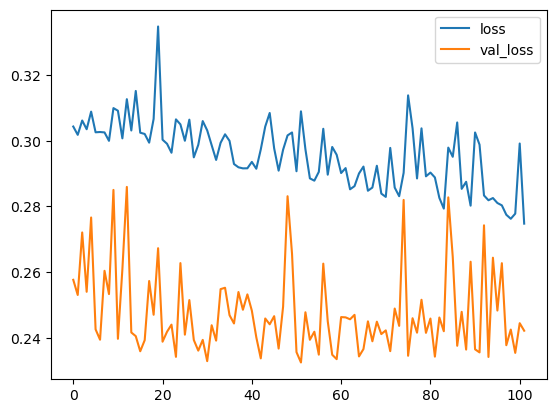

In [75]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend();

In [76]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

40/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# mnist

In [77]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# 정규화
train_x = train_x/255
test_x = test_x/255

In [78]:
def mnist_build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # optimizer = optimizers.SGD(learning_rate=0.01)
    optimizer = optimizers.Adam(learning_rate=0.001)
    # optimizer = optimizers.Adagrad(learning_rate=0.001)
    # optimizer = optimizers.RMSprop(learning_rate=0.001)
    
    model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=optimizer,
                    metrics=["accuracy"])
    
    return model

In [79]:
model = mnist_build_model()

In [ ]:
history = fit_one_more(model, train_x, train_y, test_x, test_y, callbacks, batch_size=128)

# overfitting

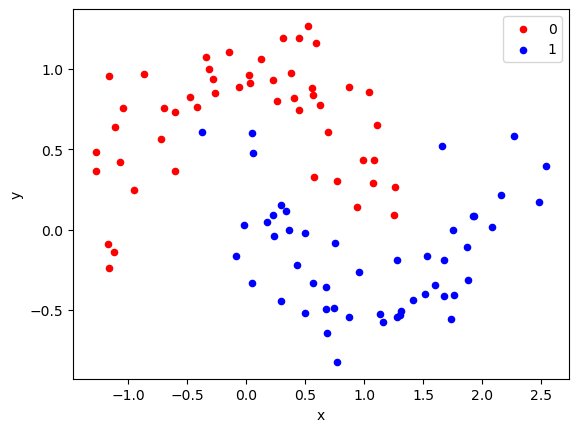

In [106]:
(train_x, train_y), (test_x, test_y) = get_moon_data()

In [116]:
def moon_build_model_overfitting():
    model = Sequential()
    model.add(Dense(20, input_shape=(2,), activation='relu', kernel_regularizer=l2() ))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = optimizers.Adam(learning_rate=0.001)
    
    model.compile(loss='binary_crossentropy',
                    optimizer=optimizer,
                    metrics=["accuracy"])
    
    return model

In [117]:
def moon_build_model_base():
    model = Sequential()
    model.add(Dense(20, input_shape=(2,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [118]:
model = moon_build_model_base()
model = moon_build_model_overfitting()

In [113]:
model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

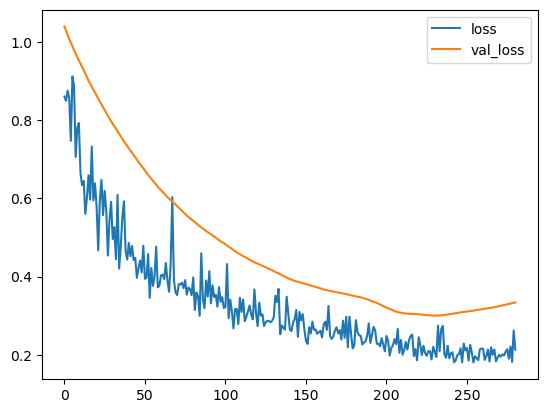

loss =  0.2126103937625885 , val_loss =  0.3335353136062622
Epoch 00281: early stopping
elapsed : 30.071852684020996


In [119]:
history = fit_one_more(model, train_x, train_y, test_x, test_y, callbacks=callbacks, batch_size=100)